___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

import tensorflow as tf
tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [55]:
X_train[0].shape

(28, 28, 1)

In [56]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

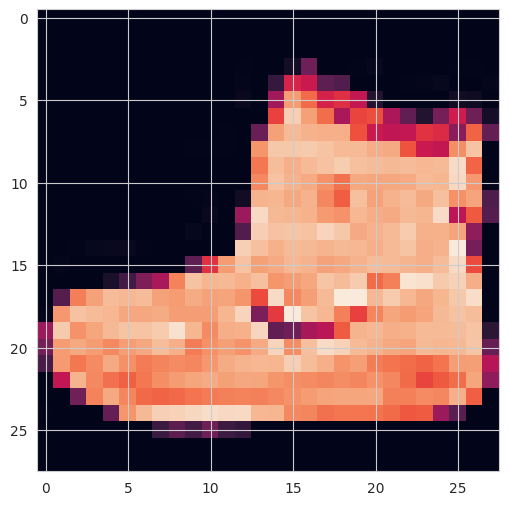

In [57]:
plt.imshow(X_train[0])

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

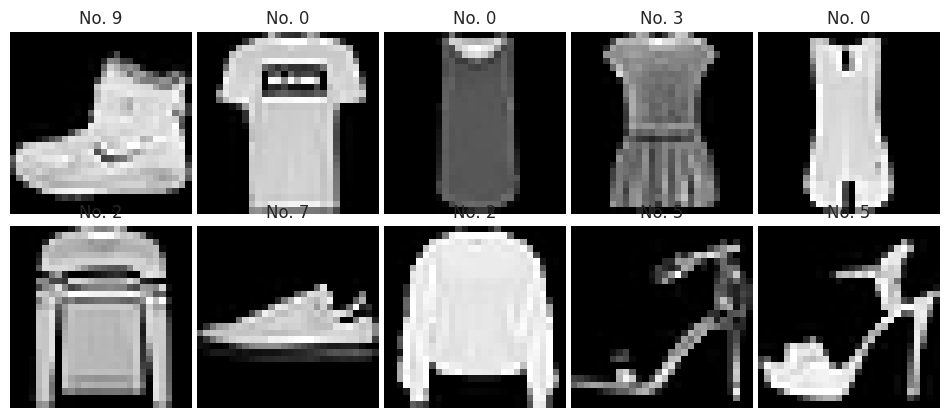

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02},
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):

        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')

plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [58]:
print("Min of X is  ",X_train.min())
print("Max of X is  ",X_train.max())

Min of X is   0.0
Max of X is   1.0


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
print("Min of X is  ",X_train.min())
print("Max of X is  ",X_train.max())

Min of X is   0.0
Max of X is   1.0


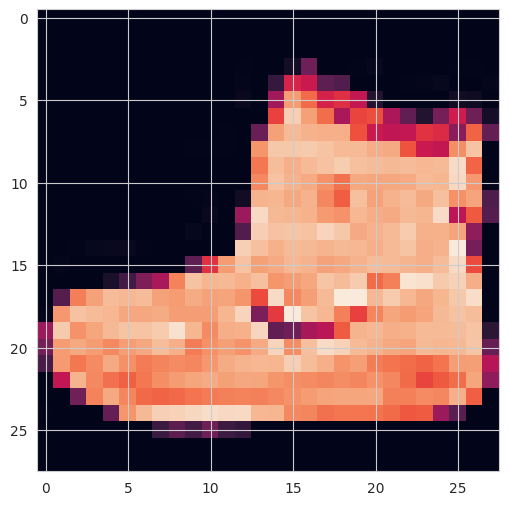

In [59]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [60]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_train.shape

(60000,)

In [21]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [22]:
y_train[8]

5

In [23]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [25]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 256)               4480256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [29]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/5
1875/1875 [==============================] - 145s 76ms/step - loss: 0.4309 - accuracy: 0.8489 - val_loss: 0.3182 - val_accuracy: 0.8819
Epoch 2/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3001 - accuracy: 0.8922 - val_loss: 0.2825 - val_accuracy: 0.8992
Epoch 3/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.2721 - accuracy: 0.9030 - val_loss: 0.3127 - val_accuracy: 0.8893
Epoch 4/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2540 - accuracy: 0.9091 - val_loss: 0.2925 - val_accuracy: 0.8959
Epoch 5/5
1875/1875 [==============================] - 134s 72ms/step - loss: 0.2455 - accuracy: 0.9135 - val_loss: 0.2963 - val_accuracy: 0.9046


**TASK 7: Plot values of metrics you used in your model.**

In [30]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.431,0.849,0.318,0.882
1,0.300,0.892,0.282,0.899
2,0.272,0.903,0.313,0.889
3,0.254,0.909,0.292,0.896
4,0.245,0.914,0.296,0.905


<Axes: >

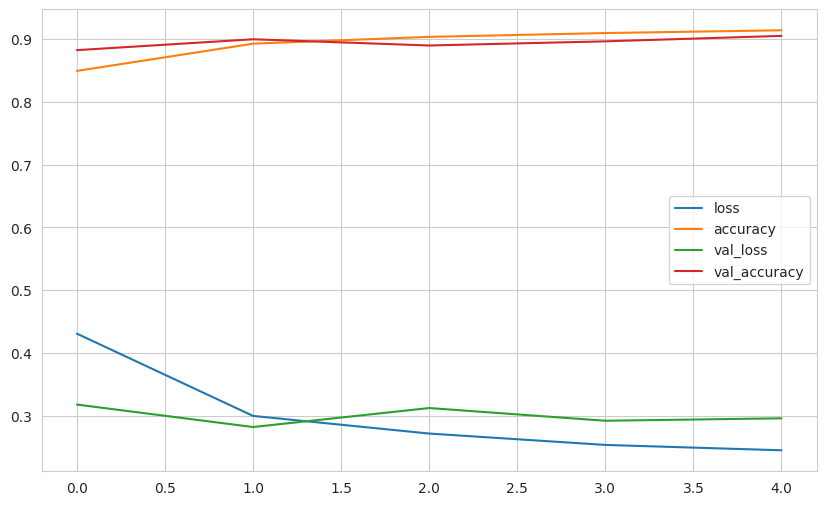

In [31]:
summary.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2825 - accuracy: 0.8992


[0.2824729382991791, 0.8992000222206116]

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2824729382991791
Test accuracy: 0.8992000222206116


In [35]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 4s 14ms/step


array([[1.3571787e-07, 3.2920834e-08, 4.0804818e-07, ..., 2.2883681e-04,
        1.2778759e-06, 9.9966073e-01],
       [8.2518109e-06, 3.6680173e-15, 9.9996871e-01, ..., 1.3512704e-12,
        9.6183173e-11, 4.1225413e-13],
       [1.6116759e-07, 9.9999934e-01, 6.8484651e-10, ..., 1.4689736e-09,
        5.5534688e-09, 1.0952901e-09],
       ...,
       [1.0366516e-06, 7.1870739e-11, 2.4105805e-07, ..., 1.1950092e-07,
        9.9998063e-01, 1.2266255e-08],
       [4.0350494e-07, 9.9996632e-01, 2.8269929e-08, ..., 1.8661322e-07,
        1.2228034e-07, 1.6429593e-07],
       [1.0434215e-02, 4.4312497e-04, 1.0948884e-02, ..., 1.6145362e-01,
        3.9975114e-02, 4.8018746e-02]], dtype=float32)

In [36]:
y_pred = np.argmax(pred_prob, axis=1)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.93      0.86      0.90      1000
           4       0.79      0.89      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.64      0.69      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [38]:
print(confusion_matrix(y_test, y_pred))

[[901   0  16  10   5   1  57   0  10   0]
 [  0 975   0  15   3   0   4   0   3   0]
 [ 16   0 827   7  87   0  63   0   0   0]
 [ 23   6  11 865  49   0  42   0   4   0]
 [  1   1  50  14 892   0  41   0   1   0]
 [  0   0   0   0   0 979   0  15   0   6]
 [173   1  70  15  89   0 636   0  16   0]
 [  0   0   0   0   0   8   0 977   0  15]
 [  3   1   1   1   1   1   3   5 984   0]
 [  0   0   0   0   0   6   0  37   1 956]]


In [39]:
(y_test != y_pred).sum()

1008

## Prediction

In [40]:
samples=[X_test[0], X_test[1], X_test[2]]

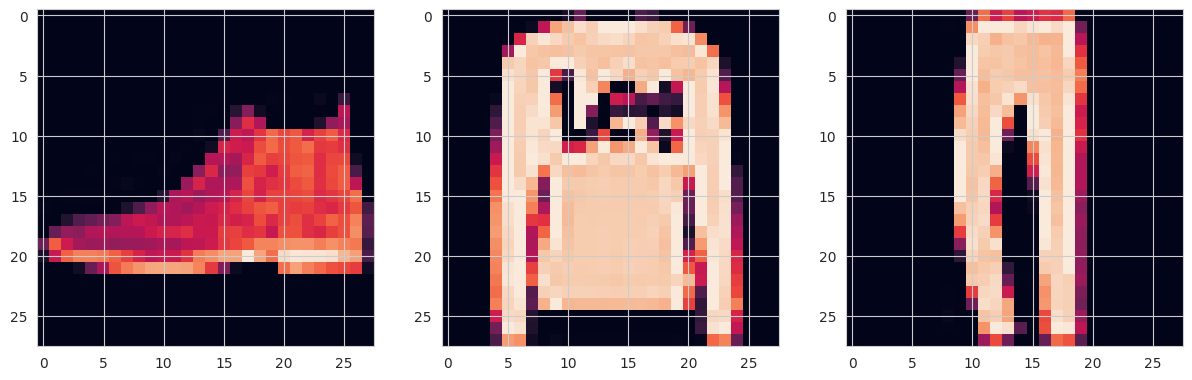

In [41]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [42]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [43]:
pred_prob = model.predict(samples)
pred_prob

1/1 [==============================] - 0s 22ms/step


array([[1.3571774e-07, 3.2920898e-08, 4.0804858e-07, 3.6186631e-07,
        3.5322067e-08, 1.0805776e-04, 1.5319257e-07, 2.2883725e-04,
        1.2778795e-06, 9.9966073e-01],
       [8.2518191e-06, 3.6680173e-15, 9.9996877e-01, 2.8078195e-09,
        5.0830226e-06, 5.6616712e-13, 1.7855557e-05, 1.3512602e-12,
        9.6182992e-11, 4.1225416e-13],
       [1.6116682e-07, 9.9999940e-01, 6.8484263e-10, 3.9606277e-07,
        6.9020537e-08, 4.5358067e-10, 2.6420139e-08, 1.4689681e-09,
        5.5534479e-09, 1.0952859e-09]], dtype=float32)

In [44]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [45]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___